In [445]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.distance import distance
import re

from cleaning_utils import * # import all existing functions from file cleaning.py
from modeling_utils import *

%load_ext autoreload
%autoreload 2


pd.set_option('display.max_columns', 360)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [446]:
blight = pd.read_csv('data/Blight.csv')
mcm = pd.read_csv('data/MCM.csv')
crimes = pd.read_csv('data/Crimes.csv')
parcels = pd.read_csv('data/Parcels.csv')

In [449]:
#crimes['coordinates'] = crimes['coordinates'].map(lambda x: eval(x))
crimes['coordinates'] = crimes.apply(coord_bligth, axis=1)

In [450]:
df = pd.merge(blight,mcm,left_on='parcel_id',right_on='parcel_id',how='left')

In [451]:
df.columns

Index(['lon', 'lat', 'ticket_id', 'violation_street_number',
       'violation_street_name', 'violation_zip_code', 'violation_date',
       'judgment_date', 'payment_date', 'payment_status', 'parcel_id',
       'compliance', 'coordinates', 'AddCombo', 'Structure', 'Condition',
       'Needs_Boarding', 'Fire', 'Dumping', 'Units', 'Improved', 'Maintained'],
      dtype='object')

In [452]:
df = df.dropna(subset=['AddCombo', 'Structure', 'Condition', 'Needs_Boarding', 'Fire', 'Dumping', 'Units', 'Improved', 'Maintained'])

In [453]:
df.shape

(51013, 22)

In [454]:
count_id = pd.DataFrame(df.groupby('parcel_id')['parcel_id'].count())
count_id = count_id.rename({'parcel_id':'parcel_count'}, axis=1)
count_id = count_id.reset_index()

In [455]:

df = pd.merge(df, count_id, left_on='parcel_id', right_on='parcel_id')
df = df[df['parcel_count'] ==1 ].drop('parcel_count', axis =1)


In [456]:
df.shape

(14601, 22)

In [431]:
#df_2011_2013['crime_counts'] = df_2011_2013.apply(crime_count, axis=1, args=[crimes_coord])

In [433]:
#crimes_2013 = crimes[(crimes.INCIDENTDATE > '2011-01-01') & (crimes.INCIDENTDATE < '2011-01-13')]

In [434]:
# coordinates_2013 = crimes_2013['coordinates'].values

In [435]:
# df_2013 = df[(df.violation_date > '2011-01-01') & (df.violation_date < '2014-12-31')]
# df_2013.shape

In [457]:
df['crimes_count'] = df.apply(crime_count, )

,lon,lat,ticket_id,violation_street_number,violation_street_name,violation_zip_code,violation_date,judgment_date,payment_date,payment_status,parcel_id,compliance,coordinates,AddCombo,Structure,Condition,Needs_Boarding,Fire,Dumping,Units,Improved,Maintained
12,-82.942097,42.388525,18657,15439,MACK,NaN,2005-01-14,2005-02-18,2005-03-09,PAID IN FULL,21001420,0,"(42.3885247860001, -82.942097334)",15433 MACK,yes,fair,no,no,no,1 unit,not_defined,unknown
21,-83.043959,42.335840,18666,426,CLINTON,NaN,2005-01-14,2005-02-18,2009-12-14,PAID IN FULL,1000217,0,"(42.335840128, -83.04395936)",426 CLINTON,yes,good,no,no,no,4+ units,not_defined,unknown
22,-83.081225,42.443874,18691,20200,CONANT,NaN,2005-01-18,2005-02-21,2005-02-21,PAID IN FULL,13025304,1,"(42.443874183, -83.081224875)",20200 CONANT,yes,good,no,no,no,4+ units,not_defined,unknown
40,-82.911887,42.414708,18737,18701,MACK,NaN,2004-11-13,1970-01-01,2005-02-18,PAID IN FULL,21001638,0,"(42.4147077000001, -82.91188676600001)",18701 MACK,yes,good,no,no,no,4+ units,not_defined,unknown
66,-82.932593,42.405329,18813,16835,WARREN,NaN,2005-01-19,2005-03-01,2005-04-06,PAID IN FULL,21002923,0,"(42.4053288010001, -82.932593207)",16835 E WARREN,yes,good,no,no,no,4+ units,not_defined,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51008,-82.943800,42.426416,536855,11626,BEACONSFIELD,48236.0,2020-10-26,2021-02-05,2021-02-05,PAID IN FULL,21065928,1,"(42.426415858, -82.943800432)",11626 BEACONSFIELD,yes,good,yes,no,no,1 unit,not_defined,unknown
51009,-83.138717,42.400246,537037,14900,PETOSKEY,48238.0,2020-12-08,2021-01-21,2021-01-21,PAID IN FULL,12012873,1,"(42.40024642, -83.1387169079999)",14900 PETOSKEY,yes,good,no,no,no,2-3 units,not_defined,unknown
51010,-83.204910,42.414164,537502,16801,RUTHERFORD,48235.0,2020-10-27,2021-01-28,2021-01-28,PAID IN FULL,22056411,1,"(42.414163585, -83.204909868)",16801 RUTHERFORD,yes,good,no,no,no,1 unit,not_defined,unknown
51011,-83.197332,42.346487,538012,7426,WINTHROP,48228.0,2020-11-30,2021-01-27,2021-01-27,PAID IN FULL,22051536,1,"(42.346487472, -83.197331794)",7426 WINTHROP,yes,good,no,no,no,1 unit,not_defined,unknown


In [436]:
pd.merge(df,parcels,left_on='parcel_id',right_on='parcel_id',how='left')

,lon,lat,ticket_id,violation_street_number,violation_street_name,violation_zip_code,violation_date,judgment_date,payment_date,payment_status,parcel_id,compliance,coordinates,AddCombo,Structure,Condition,Needs_Boarding,Fire,Dumping,Units,Improved,Maintained,address,property_class,is_improved
0,-82.942097,42.388525,18657,15439,MACK,NaN,2005-01-14,2005-02-18,2005-03-09,PAID IN FULL,21001420,0,"(42.3885247860001, -82.942097334)",15433 MACK,yes,fair,no,no,no,1 unit,not_defined,unknown,15433 MACK,201.0,1.0
1,-83.043959,42.335840,18666,426,CLINTON,NaN,2005-01-14,2005-02-18,2009-12-14,PAID IN FULL,1000217,0,"(42.335840128, -83.04395936)",426 CLINTON,yes,good,no,no,no,4+ units,not_defined,unknown,426 CLINTON,201.0,1.0
2,-83.081225,42.443874,18691,20200,CONANT,NaN,2005-01-18,2005-02-21,2005-02-21,PAID IN FULL,13025304,1,"(42.443874183, -83.081224875)",20200 CONANT,yes,good,no,no,no,4+ units,not_defined,unknown,20200 CONANT,201.0,1.0
3,-82.911887,42.414708,18737,18701,MACK,NaN,2004-11-13,1970-01-01,2005-02-18,PAID IN FULL,21001638,0,"(42.4147077000001, -82.91188676600001)",18701 MACK,yes,good,no,no,no,4+ units,not_defined,unknown,18701 MACK,201.0,1.0
4,-82.932593,42.405329,18813,16835,WARREN,NaN,2005-01-19,2005-03-01,2005-04-06,PAID IN FULL,21002923,0,"(42.4053288010001, -82.932593207)",16835 E WARREN,yes,good,no,no,no,4+ units,not_defined,unknown,16835 E WARREN,201.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14675,-82.943800,42.426416,536855,11626,BEACONSFIELD,48236.0,2020-10-26,2021-02-05,2021-02-05,PAID IN FULL,21065928,1,"(42.426415858, -82.943800432)",11626 BEACONSFIELD,yes,good,yes,no,no,1 unit,not_defined,unknown,11626 BEACONSFIELD,401.0,1.0
14676,-83.138717,42.400246,537037,14900,PETOSKEY,48238.0,2020-12-08,2021-01-21,2021-01-21,PAID IN FULL,12012873,1,"(42.40024642, -83.1387169079999)",14900 PETOSKEY,yes,good,no,no,no,2-3 units,not_defined,unknown,14900 PETOSKEY,401.0,1.0
14677,-83.204910,42.414164,537502,16801,RUTHERFORD,48235.0,2020-10-27,2021-01-28,2021-01-28,PAID IN FULL,22056411,1,"(42.414163585, -83.204909868)",16801 RUTHERFORD,yes,good,no,no,no,1 unit,not_defined,unknown,16801 RUTHERFORD,401.0,1.0
14678,-83.197332,42.346487,538012,7426,WINTHROP,48228.0,2020-11-30,2021-01-27,2021-01-27,PAID IN FULL,22051536,1,"(42.346487472, -83.197331794)",7426 WINTHROP,yes,good,no,no,no,1 unit,not_defined,unknown,7426 WINTHROP,401.0,1.0


In [437]:
df.columns

Index(['lon', 'lat', 'ticket_id', 'violation_street_number',
       'violation_street_name', 'violation_zip_code', 'violation_date',
       'judgment_date', 'payment_date', 'payment_status', 'parcel_id',
       'compliance', 'coordinates', 'AddCombo', 'Structure', 'Condition',
       'Needs_Boarding', 'Fire', 'Dumping', 'Units', 'Improved', 'Maintained'],
      dtype='object')

In [438]:
target = df['compliance']

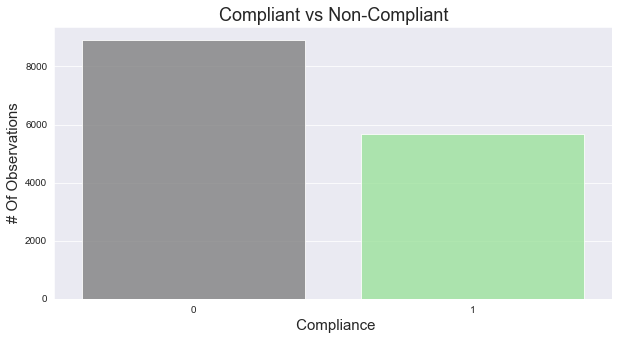

In [439]:
# Target Variable Countplot
sns.set_style('darkgrid')
plt.figure(figsize = (10,5))
sns.countplot(df['compliance'], alpha =.80, palette= ['grey','lightgreen'])
plt.title('Compliant vs Non-Compliant', size = 18)
plt.ylabel('# Of Observations', size =15)
plt.xlabel(' Compliance', size =15)
plt.show()

In [458]:
df

,lon,lat,ticket_id,violation_street_number,violation_street_name,violation_zip_code,violation_date,judgment_date,payment_date,payment_status,parcel_id,compliance,coordinates,AddCombo,Structure,Condition,Needs_Boarding,Fire,Dumping,Units,Improved,Maintained
12,-82.942097,42.388525,18657,15439,MACK,NaN,2005-01-14,2005-02-18,2005-03-09,PAID IN FULL,21001420,0,"(42.3885247860001, -82.942097334)",15433 MACK,yes,fair,no,no,no,1 unit,not_defined,unknown
21,-83.043959,42.335840,18666,426,CLINTON,NaN,2005-01-14,2005-02-18,2009-12-14,PAID IN FULL,1000217,0,"(42.335840128, -83.04395936)",426 CLINTON,yes,good,no,no,no,4+ units,not_defined,unknown
22,-83.081225,42.443874,18691,20200,CONANT,NaN,2005-01-18,2005-02-21,2005-02-21,PAID IN FULL,13025304,1,"(42.443874183, -83.081224875)",20200 CONANT,yes,good,no,no,no,4+ units,not_defined,unknown
40,-82.911887,42.414708,18737,18701,MACK,NaN,2004-11-13,1970-01-01,2005-02-18,PAID IN FULL,21001638,0,"(42.4147077000001, -82.91188676600001)",18701 MACK,yes,good,no,no,no,4+ units,not_defined,unknown
66,-82.932593,42.405329,18813,16835,WARREN,NaN,2005-01-19,2005-03-01,2005-04-06,PAID IN FULL,21002923,0,"(42.4053288010001, -82.932593207)",16835 E WARREN,yes,good,no,no,no,4+ units,not_defined,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51008,-82.943800,42.426416,536855,11626,BEACONSFIELD,48236.0,2020-10-26,2021-02-05,2021-02-05,PAID IN FULL,21065928,1,"(42.426415858, -82.943800432)",11626 BEACONSFIELD,yes,good,yes,no,no,1 unit,not_defined,unknown
51009,-83.138717,42.400246,537037,14900,PETOSKEY,48238.0,2020-12-08,2021-01-21,2021-01-21,PAID IN FULL,12012873,1,"(42.40024642, -83.1387169079999)",14900 PETOSKEY,yes,good,no,no,no,2-3 units,not_defined,unknown
51010,-83.204910,42.414164,537502,16801,RUTHERFORD,48235.0,2020-10-27,2021-01-28,2021-01-28,PAID IN FULL,22056411,1,"(42.414163585, -83.204909868)",16801 RUTHERFORD,yes,good,no,no,no,1 unit,not_defined,unknown
51011,-83.197332,42.346487,538012,7426,WINTHROP,48228.0,2020-11-30,2021-01-27,2021-01-27,PAID IN FULL,22051536,1,"(42.346487472, -83.197331794)",7426 WINTHROP,yes,good,no,no,no,1 unit,not_defined,unknown


In [440]:
features =['Structure', 'Condition', 'Needs_Boarding', 'Fire', 'Dumping', 'Units', 'Improved', 'Maintained']

In [441]:
df[features].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14601 entries, 12 to 51012
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Structure       14601 non-null  object
 1   Condition       14601 non-null  object
 2   Needs_Boarding  14601 non-null  object
 3   Fire            14601 non-null  object
 4   Dumping         14601 non-null  object
 5   Units           14601 non-null  object
 6   Improved        14601 non-null  object
 7   Maintained      14601 non-null  object
dtypes: object(8)
memory usage: 1.6+ MB


In [444]:
to_dummies(df, features)

,lon,lat,ticket_id,violation_street_number,violation_street_name,violation_zip_code,violation_date,judgment_date,payment_date,payment_status,parcel_id,compliance,coordinates,AddCombo,Struc_yes,Condi_good,Condi_poor,Condi_suggest demolition,Needs_yes,Fire_yes,Dumpi_yes,Units_1 unit,Units_2-3 units,Units_4+ units,Impro_not_defined,Impro_unimproved,Maint_unknown,Maint_yes
12,-82.942097,42.388525,18657,15439,MACK,NaN,2005-01-14,2005-02-18,2005-03-09,PAID IN FULL,21001420,0,"(42.3885247860001, -82.942097334)",15433 MACK,1,0,0,0,0,0,0,1,0,0,1,0,1,0
21,-83.043959,42.335840,18666,426,CLINTON,NaN,2005-01-14,2005-02-18,2009-12-14,PAID IN FULL,1000217,0,"(42.335840128, -83.04395936)",426 CLINTON,1,1,0,0,0,0,0,0,0,1,1,0,1,0
22,-83.081225,42.443874,18691,20200,CONANT,NaN,2005-01-18,2005-02-21,2005-02-21,PAID IN FULL,13025304,1,"(42.443874183, -83.081224875)",20200 CONANT,1,1,0,0,0,0,0,0,0,1,1,0,1,0
40,-82.911887,42.414708,18737,18701,MACK,NaN,2004-11-13,1970-01-01,2005-02-18,PAID IN FULL,21001638,0,"(42.4147077000001, -82.91188676600001)",18701 MACK,1,1,0,0,0,0,0,0,0,1,1,0,1,0
66,-82.932593,42.405329,18813,16835,WARREN,NaN,2005-01-19,2005-03-01,2005-04-06,PAID IN FULL,21002923,0,"(42.4053288010001, -82.932593207)",16835 E WARREN,1,1,0,0,0,0,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51008,-82.943800,42.426416,536855,11626,BEACONSFIELD,48236.0,2020-10-26,2021-02-05,2021-02-05,PAID IN FULL,21065928,1,"(42.426415858, -82.943800432)",11626 BEACONSFIELD,1,1,0,0,1,0,0,1,0,0,1,0,1,0
51009,-83.138717,42.400246,537037,14900,PETOSKEY,48238.0,2020-12-08,2021-01-21,2021-01-21,PAID IN FULL,12012873,1,"(42.40024642, -83.1387169079999)",14900 PETOSKEY,1,1,0,0,0,0,0,0,1,0,1,0,1,0
51010,-83.204910,42.414164,537502,16801,RUTHERFORD,48235.0,2020-10-27,2021-01-28,2021-01-28,PAID IN FULL,22056411,1,"(42.414163585, -83.204909868)",16801 RUTHERFORD,1,1,0,0,0,0,0,1,0,0,1,0,1,0
51011,-83.197332,42.346487,538012,7426,WINTHROP,48228.0,2020-11-30,2021-01-27,2021-01-27,PAID IN FULL,22051536,1,"(42.346487472, -83.197331794)",7426 WINTHROP,1,1,0,0,0,0,0,1,0,0,1,0,1,0
